<a href="https://colab.research.google.com/github/SibongileT/SpotifyYearEndPlaylistEDA/blob/main/SpotifyEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/content/drive/MyDrive/SpotifyEDA/lyrics_data.csv"
lyrics_df = pd.read_csv(path,index_col=0)

In [3]:
path = "/content/drive/MyDrive/SpotifyEDA/playlist_data.csv"
playlist_df = pd.read_csv(path,index_col=0)

In [4]:
playlist_df.shape,lyrics_df.shape

((500, 20), (500, 4))

In [5]:
lyrics_df = lyrics_df.rename(columns={'song_id':'id'})

In [6]:
lyrics_df.head()

,artist,song,lyrics,id
0,Rihanna,Sex With Me,"Sex with me, so amazing\nAll this all hard wor...",6WAxKNbZoGNzQTIvdMqkFs
1,Fifth Harmony,Dope,"New Jersey tongue, not saying too much\nI'm fe...",660JUD1xQLB4XR1dMxUK4x
2,Solange,Cranes in the Sky,I tried to drink it away\nI tried to put one i...,48EjSdYh8wz2gBxxqzrsLe
3,DJ Khaled,For Free,Would you fuck me for free?\nAnother one (Anot...,4JDZl9nKIAhAhDjw753u4X
4,Yuna,Crush,You call me on a lazy afternoon\nAsking me wha...,3Txcx4jhuiTZSvhAL0WaRc


In [7]:
lyrics_nodups_df = lyrics_df.drop_duplicates()

In [8]:
playlist_df.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,year,playlist_title,id
0,Sex With Me,Rihanna,0.580,0.532,1,-5.668,0,0.0424,0.2940,0.000000,0.0948,0.390,112.049,206400,4,20.87658,10,2016,Your top songs 2016,6WAxKNbZoGNzQTIvdMqkFs
1,Dope,Fifth Harmony,0.719,0.519,0,-6.545,1,0.0494,0.1300,0.000000,0.0833,0.122,90.995,212626,4,32.72684,13,2016,Your top songs 2016,660JUD1xQLB4XR1dMxUK4x
2,Cranes in the Sky,Solange,0.719,0.615,6,-5.972,1,0.0450,0.4080,0.000147,0.2350,0.465,96.988,250973,4,18.63714,5,2016,Your top songs 2016,48EjSdYh8wz2gBxxqzrsLe
3,For Free (feat. Drake),DJ Khaled,0.916,0.571,10,-8.241,0,0.2000,0.0173,0.000001,0.1530,0.498,103.521,183695,4,29.67050,10,2016,Your top songs 2016,4JDZl9nKIAhAhDjw753u4X
4,Crush,Yuna,0.678,0.414,9,-10.144,0,0.0498,0.3660,0.000004,0.0885,0.355,130.031,243133,4,29.11098,9,2016,Your top songs 2016,3Txcx4jhuiTZSvhAL0WaRc


In [9]:
playlist_df2 = pd.merge(playlist_df,lyrics_nodups_df[['lyrics','id']].copy(),on='id',how='left')

In [10]:
playlist_df2.shape

(500, 21)

In [11]:
playlist_df2.head()

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,year,playlist_title,id,lyrics
0,Sex With Me,Rihanna,0.580,0.532,1,-5.668,0,0.0424,0.2940,0.000000,0.0948,0.390,112.049,206400,4,20.87658,10,2016,Your top songs 2016,6WAxKNbZoGNzQTIvdMqkFs,"Sex with me, so amazing\nAll this all hard wor..."
1,Dope,Fifth Harmony,0.719,0.519,0,-6.545,1,0.0494,0.1300,0.000000,0.0833,0.122,90.995,212626,4,32.72684,13,2016,Your top songs 2016,660JUD1xQLB4XR1dMxUK4x,"New Jersey tongue, not saying too much\nI'm fe..."
2,Cranes in the Sky,Solange,0.719,0.615,6,-5.972,1,0.0450,0.4080,0.000147,0.2350,0.465,96.988,250973,4,18.63714,5,2016,Your top songs 2016,48EjSdYh8wz2gBxxqzrsLe,I tried to drink it away\nI tried to put one i...
3,For Free (feat. Drake),DJ Khaled,0.916,0.571,10,-8.241,0,0.2000,0.0173,0.000001,0.1530,0.498,103.521,183695,4,29.67050,10,2016,Your top songs 2016,4JDZl9nKIAhAhDjw753u4X,Would you fuck me for free?\nAnother one (Anot...
4,Crush,Yuna,0.678,0.414,9,-10.144,0,0.0498,0.3660,0.000004,0.0885,0.355,130.031,243133,4,29.11098,9,2016,Your top songs 2016,3Txcx4jhuiTZSvhAL0WaRc,You call me on a lazy afternoon\nAsking me wha...


## Clean up and explore lyrics

In [12]:
playlist_df2['lyrics'] = playlist_df2['lyrics'].astype('str')

In [13]:
playlist_df2[playlist_df2['lyrics']=='nan']

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,year,playlist_title,id,lyrics
197,"Defying Gravity - From ""Wicked"" Original Broad...",Stephen Schwartz,0.333,0.377,6,-8.282,1,0.0343,0.7220,0.0000,0.0333,0.2450,87.613,353920,4,9.27374,13,2017,Your top songs 2017,1bpnYrDCforv9ctJMzJRV8,nan
275,"Vesperae Solennes de Confessore in C Major, K....",Nicholas Britell,0.100,0.143,5,-17.169,1,0.0452,0.9330,0.5630,0.1260,0.0961,84.352,102040,3,26.40166,5,2018,Your top songs 2018,5nJCOiLpE4kQIv6xtPLRd1,nan
289,Phantom Thread I,Jonny Greenwood,0.101,0.163,4,-18.659,0,0.0486,0.9820,0.9050,0.0906,0.0307,78.828,215666,4,57.72622,12,2018,Your top songs 2018,1m9AByDH4oBDz7XEm0yVjx,nan
291,Égypte,Luc Gilbert,0.323,0.439,9,-13.658,0,0.0542,0.4790,0.0484,0.2670,0.3720,183.822,267000,4,44.32804,9,2018,Your top songs 2018,0RV3vIIPkglmVAIFQ22K2l,nan
389,JA ARA E,Beyoncé,0.790,0.693,0,-5.767,1,0.0605,0.0420,0.0267,0.0790,0.8550,91.991,190108,4,18.27752,10,2019,Your top songs 2019,6pdip6qgVJOI5JxqgbAlu6,nan
425,B*tch From Da Souf (Remix) (feat. Trina),Mulatto,0.835,0.530,1,-5.699,1,0.3600,0.0649,0.0000,0.1330,0.4140,150.081,224119,4,45.21772,11,2020,Your top songs 2020,39GH3B0XsTd4SsqT7DJijs,nan


Try and add lyrics for songs with missing lyrics

In [14]:
!pip install lyricsgenius
import lyricsgenius
genius = lyricsgenius.Genius("2rxZwYupzW9ZPWxmSBe0tJZB15_-kuco7H1DepqINhhdjrACt4_RPRDF0OrQDdiv")
genius.remove_section_headers = True

In [15]:
 song = genius.search_song('Bitch From Da Souf Remix','Mulatto')

Searching for "Bitch From Da Souf Remix" by Mulatto...
Done.


In [16]:
song.lyrics

'Big \'Latto, big remix (Bankroll Got It), yeah\n\nI throw that ass back to see if\u2005he\u2005gon\' catch it\u2005(I throw it)\nI ain\'t athletic, but\u2005it\'s tennis for the necklace, yeah (Ice, ice)\nAyy, where that cash at? I stack it like Tetris (Okay)\nReal gutta bitch, real plugs and connections (Real bitch)\nFirst I make him eat it \'til he lockjaw (Yeah)\nGive it to him good, knock a nigga socks off, uh (Yeah)\nI run it up, they busy running they mouth (Run it, run it)\nI\'m a real-ass, rich-ass bitch from the Souf, yeah, yeah (Uh, uh, Souf)\n\nFirst off, I ain\'t fuckin\' for no clout (Nah)\nI ain\'t fuckin\' on no nigga sleepin\' on his patna couch (What the fuck?)\nHe wanna fuck, rather sit it on his mouth (Uhh)\nI\'m a freak-ass, street-ass, bitch from the Souf (Haa)\nIs you gon\' catch it? Eat it up for breakfast? (Yeah)\nI ain\'t athletic on the dick, I do gymnastics (Okay)\nI hit up Saweetie like, "What\'s up? I\'m in The Bay" (The Bay)\nThe baddest bitch in MIA said

In [18]:
playlist_df2.loc[425,'lyrics'] = song.lyrics

In [19]:
jare = genius.search_song('JA ARA E','Burna boy')

Searching for "JA ARA E" by Burna boy...
Done.


In [20]:
playlist_df2.loc[389,'lyrics'] = jare.lyrics


In [21]:
playlist_df2.loc[389,'artist'] = 'Burna Boy'

In [22]:
defying_gravity = genius.search_song('Defying Gravity','Kristin Chenoweth')

Searching for "Defying Gravity" by Kristin Chenoweth...
Done.


In [23]:
playlist_df2.loc[197,'lyrics'] = defying_gravity.lyrics

In [25]:
egypte = genius.search_song('Égypte','Cirque Du Soleil')

Searching for "Égypte" by Cirque Du Soleil...
Done.


In [26]:
playlist_df2.loc[291,'lyrics'] = egypte.lyrics

## Remove newlines from lyrics

In [24]:
playlist_df2['lyrics'] = playlist_df2['lyrics'].astype('str')

In [29]:
playlist_df2['lyrics'] = playlist_df2['lyrics'].map(lambda x: x.replace('\n',' '))

In [30]:
playlist_df2['lyrics']

0      Sex with me, so amazing All this all hard work...
1      New Jersey tongue, not saying too much I'm fee...
2      I tried to drink it away I tried to put one in...
3      Would you fuck me for free? Another one (Anoth...
4      You call me on a lazy afternoon Asking me what...
                             ...                        
495    ...bae...  Ah, ah-ah, ah-ah, ah-ah Ah, ah-ah, ...
496    When I'm weary and so worn out Ooh, when my mi...
497    So many times that I tried to get over you, no...
498    Yeah (Turn me up, YC) JT  Uh, fuck nigga, I do...
499    No, don't shoot me down (Yeah) No, don't shoot...
Name: lyrics, Length: 500, dtype: object

## Check for the few nan I have left

In [31]:
playlist_df2[playlist_df2['lyrics']=='nan']

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,year,playlist_title,id,lyrics
275,"Vesperae Solennes de Confessore in C Major, K....",Nicholas Britell,0.100,0.143,5,-17.169,1,0.0452,0.933,0.563,0.1260,0.0961,84.352,102040,3,26.40166,5,2018,Your top songs 2018,5nJCOiLpE4kQIv6xtPLRd1,nan
289,Phantom Thread I,Jonny Greenwood,0.101,0.163,4,-18.659,0,0.0486,0.982,0.905,0.0906,0.0307,78.828,215666,4,57.72622,12,2018,Your top songs 2018,1m9AByDH4oBDz7XEm0yVjx,nan


* Both the nan are instrumental songs as suspected will now move onto some EDA

In [32]:
playlist_df2['artist'].value_counts()

Megan Thee Stallion    20
Lizzo                  16
Ariana Grande          13
Solange                13
Snoh Aalegra           12
                       ..
Maroon 5                1
Boris Gardiner          1
Leona Lewis             1
Maliibu Miitch          1
21 Savage               1
Name: artist, Length: 178, dtype: int64

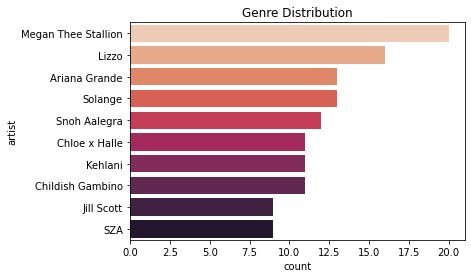

In [37]:
import seaborn as sns
sns.countplot(y='artist', data=playlist_df2 ,palette='rocket_r',order = playlist_df2['artist'].value_counts().nlargest(10).index)
plt.title('Top Artist across 5 years');

In [42]:
playlist_df2[playlist_df2['year']==2016]['artist'].value_counts().nlargest(10)

Lianne La Havas     5
Rihanna             4
Ariana Grande       4
Childish Gambino    3
TWENTY88            3
Drake               3
Shelley FKA DRAM    3
James Blake         3
Solange             3
Kanye West          3
Name: artist, dtype: int64

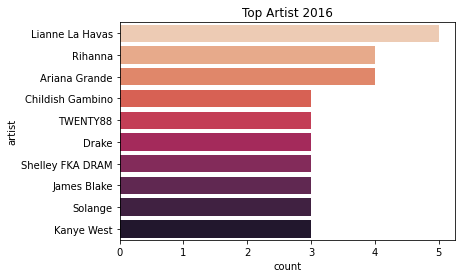

In [45]:
import seaborn as sns
sns.countplot(y='artist', data=playlist_df2[playlist_df2['year']==2016] ,palette='rocket_r',order = playlist_df2[playlist_df2['year']==2016]['artist'].value_counts().nlargest(10).index)
plt.title('Top Artist 2016');

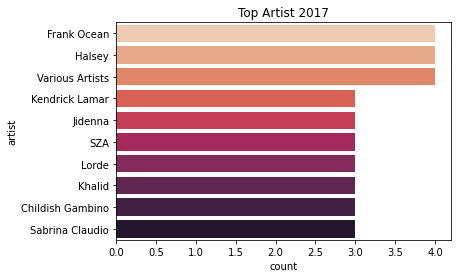

In [48]:
import seaborn as sns
sns.countplot(y='artist', data=playlist_df2[playlist_df2['year']==2017] ,palette='rocket_r',order = playlist_df2[playlist_df2['year']==2017]['artist'].value_counts().nlargest(10).index)
plt.title('Top Artist 2017');

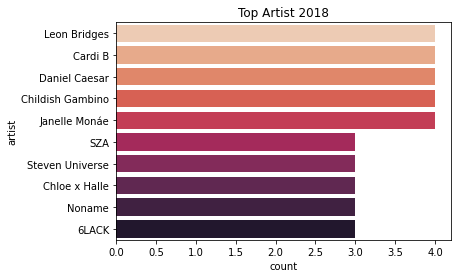

In [49]:
import seaborn as sns
sns.countplot(y='artist', data=playlist_df2[playlist_df2['year']==2018] ,palette='rocket_r',order = playlist_df2[playlist_df2['year']==2018]['artist'].value_counts().nlargest(10).index)
plt.title('Top Artist 2018');

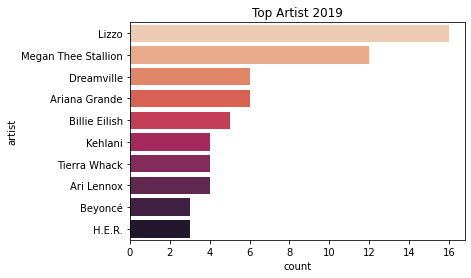

In [50]:
import seaborn as sns
sns.countplot(y='artist', data=playlist_df2[playlist_df2['year']==2019] ,palette='rocket_r',order = playlist_df2[playlist_df2['year']==2019]['artist'].value_counts().nlargest(10).index)
plt.title('Top Artist 2019');

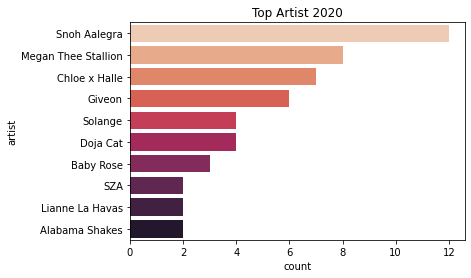

In [51]:
import seaborn as sns
sns.countplot(y='artist', data=playlist_df2[playlist_df2['year']==2020] ,palette='rocket_r',order = playlist_df2[playlist_df2['year']==2020]['artist'].value_counts().nlargest(10).index)
plt.title('Top Artist 2020');

In [33]:
playlist_df2['name'].value_counts()

The Way                                4
A Long Walk                            3
Mad (feat. Lil Wayne)                  3
Pretty Little Fears (feat. J. Cole)    3
This Feeling                           3
                                      ..
RPG (feat. 6lack)                      1
California                             1
Childs Play                            1
Moon River                             1
Black Beatles                          1
Name: name, Length: 448, dtype: int64

## Change Year to datetime

In [104]:
import datetime as dt

In [106]:
playlist_df2['year'] = pd.to_datetime(playlist_df2['year'], format='%Y')

In [108]:
playlist_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              500 non-null    object        
 1   artist            500 non-null    object        
 2   danceability      500 non-null    float64       
 3   energy            500 non-null    float64       
 4   key               500 non-null    int64         
 5   loudness          500 non-null    float64       
 6   mode              500 non-null    int64         
 7   speechiness       500 non-null    float64       
 8   acousticness      500 non-null    float64       
 9   instrumentalness  500 non-null    float64       
 10  liveness          500 non-null    float64       
 11  valence           500 non-null    float64       
 12  tempo             500 non-null    float64       
 13  duration_ms       500 non-null    int64         
 14  time_signature    500 non-

## Bar plot of top artist over 5 years


In [71]:
playlist_df2.to_csv('music_data.csv')
!cp music_data.csv "drive/My Drive/SpotifyEDA"

In [76]:
import plotly.express as px

In [78]:
playlist_df2[playlist_df2['year']==2016].valence.mean()

0.38381400000000016

In [79]:
playlist_df2[playlist_df2['year']==2017].valence.mean()

0.43529

In [80]:
playlist_df2[playlist_df2['year']==2018].valence.mean()

0.3925500000000001

In [81]:
playlist_df2[playlist_df2['year']==2019].valence.mean()

0.46044999999999997

In [82]:
playlist_df2[playlist_df2['year']==2020].valence.mean()

0.43603499999999984

In [87]:
top_10 = playlist_df2['artist'].value_counts().nlargest(10)

In [90]:
mask = playlist_df2['artist'].isin(top_10.index)

In [91]:
top_artist = playlist_df2['artist'][mask]

In [92]:
top_artist

2                  Solange
8                  Solange
10           Ariana Grande
14                 Solange
19                 Kehlani
              ...         
477    Megan Thee Stallion
493           Snoh Aalegra
494                    SZA
495                Solange
497           Snoh Aalegra
Name: artist, Length: 125, dtype: object

In [114]:
fig = px.scatter(playlist_df2,x='energy', y='valence',color='playlist_title',title="Energy/Valance Across Playlist", hover_name="name",hover_data=["artist"])
fig.show()


Energy/Valance across years

In [124]:
valence_means = playlist_df2.groupby('playlist_title')['valence'].mean().reset_index()

In [125]:
valence_means

,playlist_title,valence
0,Your top songs 2016,0.383814
1,Your top songs 2017,0.435290
2,Your top songs 2018,0.392550
3,Your top songs 2019,0.460450
4,Your top songs 2020,0.436035


In [127]:
fig = px.bar(valence_means, x='playlist_title', y='valence',color='playlist_title',title='Average Valence Across years')
fig.show()

In [128]:
energy_means = playlist_df2.groupby('playlist_title')['energy'].mean().reset_index()

In [129]:
fig = px.bar(energy_means, x='playlist_title', y='energy',color='playlist_title',title='Average Energy Across years')
fig.show()